In [1]:
# view PE coeff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tables
import h5py
from scipy.spatial.distance import pdist, squareform
import os

/home/douwei/Recon1t/calib/Note


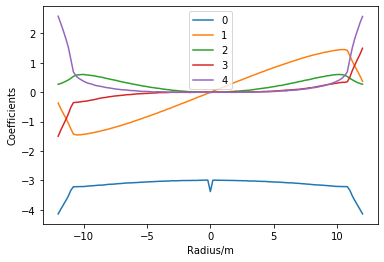

In [2]:
import os
import tables
print(os.getcwd())
def findfile(radius):
    filename = '../coeff_pe/5kt_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    expect = np.array(h.root.mean)[:]
    predict = np.array(h.root.predict)[:]
    h.close()
    return coeff, expect, predict
coeff = [];
expect = [];
predict = [];
for i in np.arange(12,-12.2,-0.2):
    file_str = '%+.2f' % i
    a1,a2,a3 = findfile(file_str)
    coeff.append(a1)
    expect.append(a2)
    predict.append(a3)
pe_coeff = np.array(coeff)
radius = np.arange(12,-12.2,-0.2)
plt.plot(radius, pe_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')

plt.legend(range(5))
plt.show()

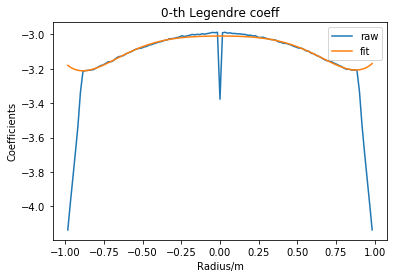

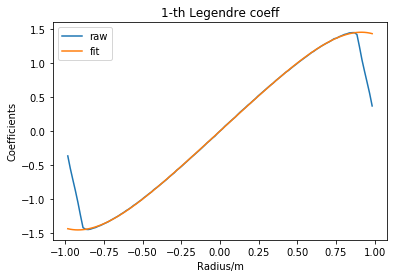

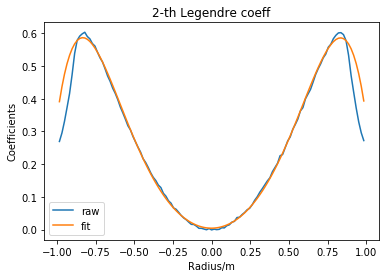

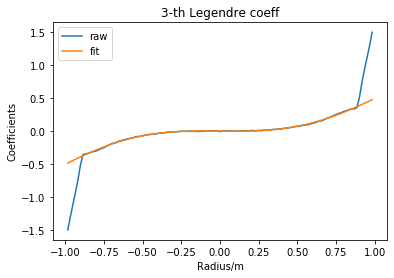

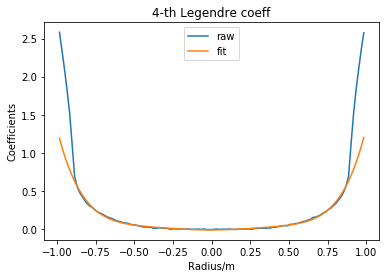

In [5]:
k1 = np.zeros((np.size(pe_coeff[0]),7))
radius = np.arange(12,-12.2,-0.2)
for i in np.arange(np.size(pe_coeff[0])):
    data = np.nan_to_num(pe_coeff[:,i])
    x = radius/12.2
    plt.plot(x, data)
    '''
    a = np.polyfit(x, data, 8)
    print(a)
    b = np.poly1d(a)
    c = b(x)
    plt.plot(x,c)'''
    index = (x<0.9) & (x>-0.9) & (x!=0)
    c = np.polynomial.legendre.legfit(x[index], data[index], 6)
    k1[i,:] = c
    plt.plot(x, np.polynomial.legendre.legval(x,c))

    plt.xlabel('Radius/m')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw','fit'])
    plt.show()
with h5py.File('../PE_coeff.h5','w') as out:
    out.create_dataset('coeff', data = k1)

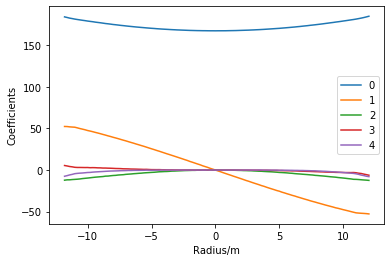

In [6]:
def findfile(radius):
    filename = '../coeff_time/5kt_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    h.close()
    return coeff
coeff = [];
for i in np.arange(12,-12,-0.2):
    file_str = '%+.2f' % i
    coeff.append(findfile(file_str))

time_coeff = np.array(coeff)
radius = np.arange(12,-12,-0.2)
plt.plot(radius, time_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')
plt.legend(range(5))
plt.show()

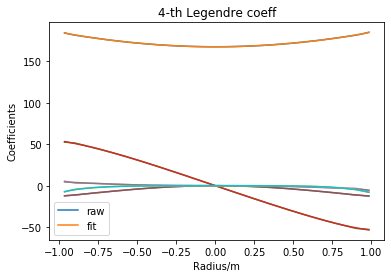

In [7]:
import h5py
k1 = np.zeros((5,7))
radius = np.arange(12,-12,-0.2)
for i in np.arange(np.size(time_coeff[0])):
    data = np.nan_to_num(time_coeff[:,i])
    x = radius/12.2
    plt.plot(x, data)
    '''
    a = np.polyfit(x, data, 8)
    print(a)
    b = np.poly1d(a)
    c = b(x)
    plt.plot(x,c)'''
    c = np.polynomial.legendre.legfit(x, data, 6)
    k1[i,:] = c
    plt.plot(x, np.polynomial.legendre.legval(x,c))

    plt.xlabel('Radius/m')
    plt.ylabel('Coefficients')
    plt.title(str(i)+'-th Legendre coeff')
    plt.legend(['raw','fit'])
with h5py.File('../Time_coeff.h5','w') as out:
    out.create_dataset('coeff', data = k1)

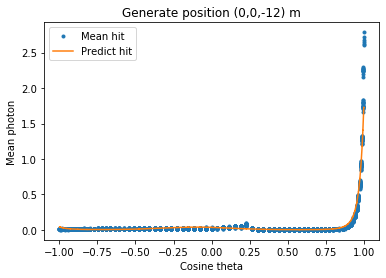

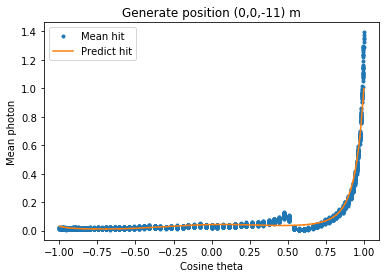

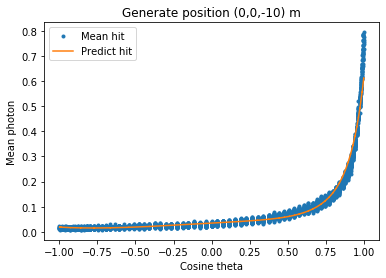

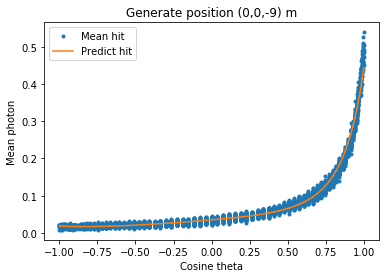

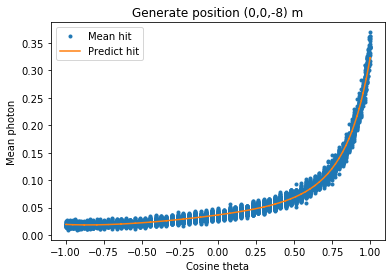

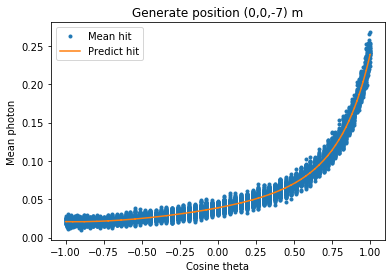

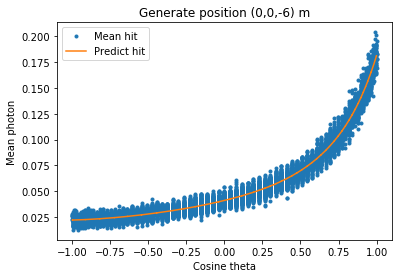

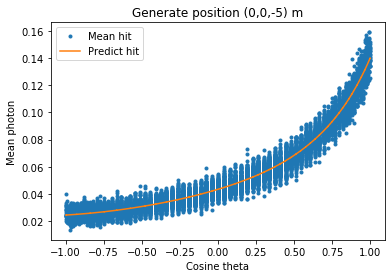

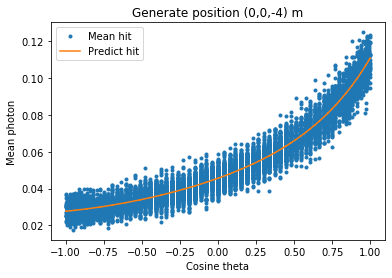

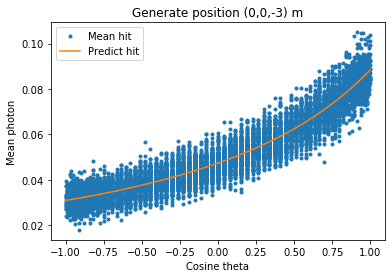

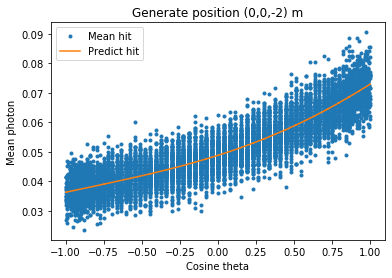

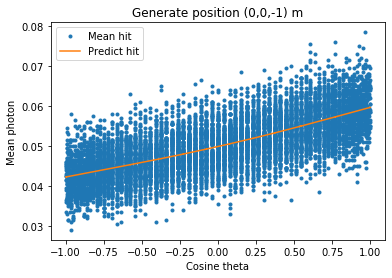

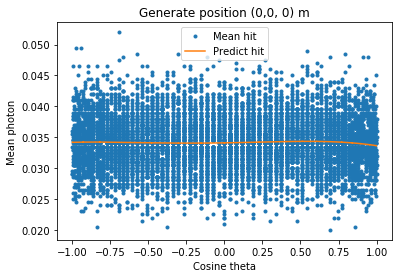

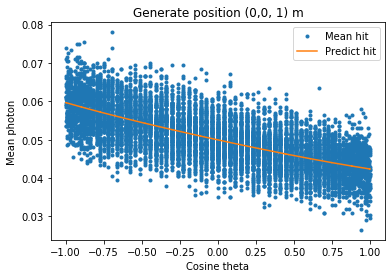

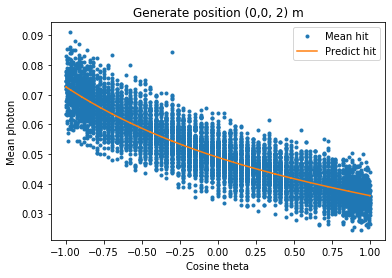

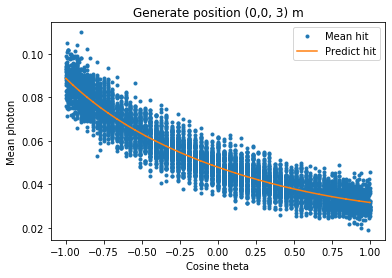

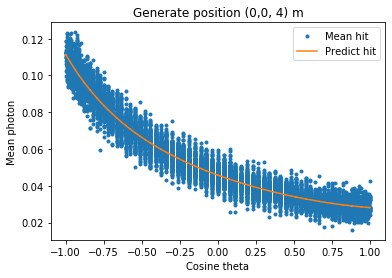

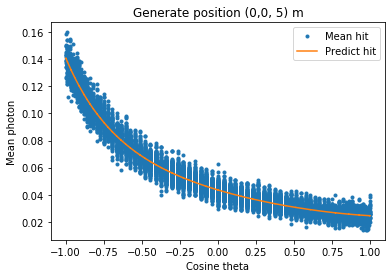

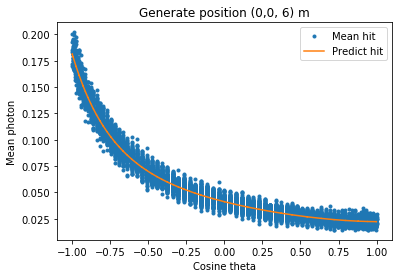

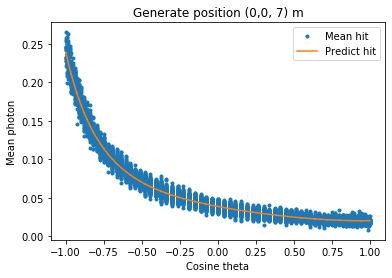

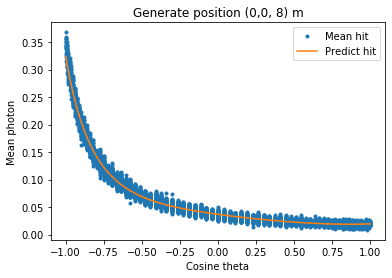

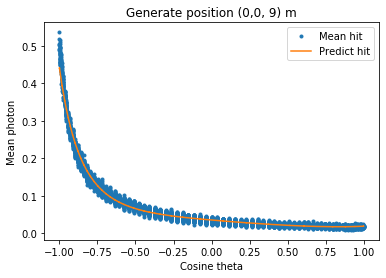

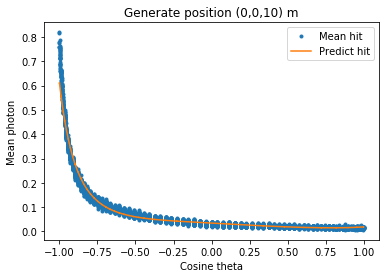

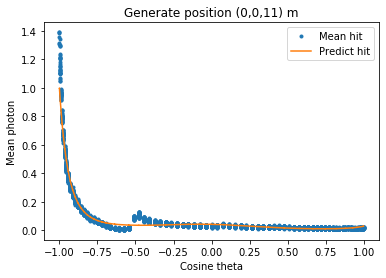

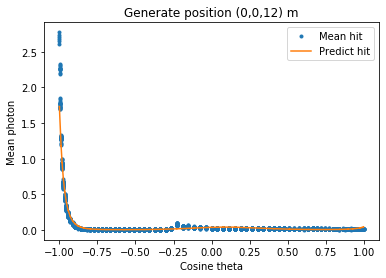

In [9]:
# view fit pe goodness

def ReadPMT(geo):
    f = open(r'../PMT_' + geo + '.txt')
    line = f.readline()
    data_list = []
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    PMT_pos = PMT_pos[:,1:4]
    return PMT_pos
PMT_pos = ReadPMT('5kt')
vertex = np.array([0,0,10])
cos_theta = np.sum(vertex*PMT_pos,axis=1)\
    /np.sqrt(np.sum(vertex**2)*np.sum(PMT_pos**2,axis=1))
for i in np.arange(0,121,5):
    plt.plot(cos_theta, expect[i],'.')
    plt.plot(cos_theta, predict[i])
    plt.xlabel('Cosine theta')
    plt.ylabel('Mean photon')
    plt.title('Generate position (0,0,%2.f) m' % (i*0.2-12))
    plt.legend(['Mean hit','Predict hit'])
    plt.show()

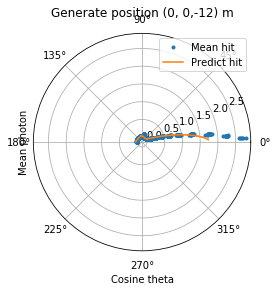

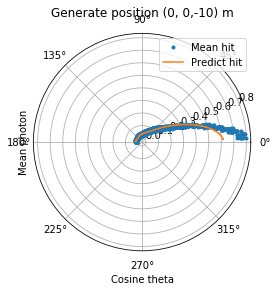

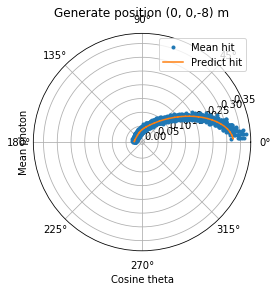

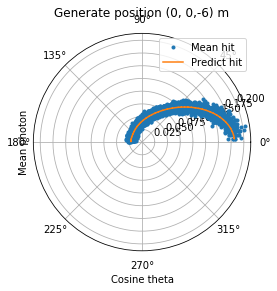

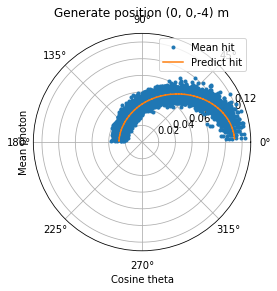

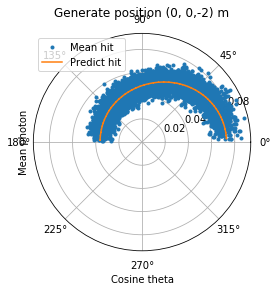

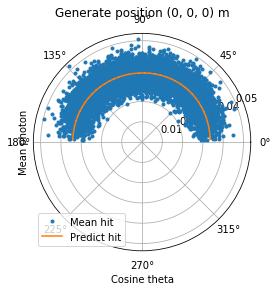

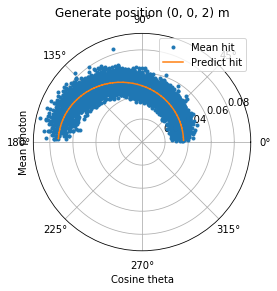

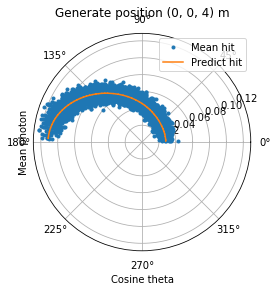

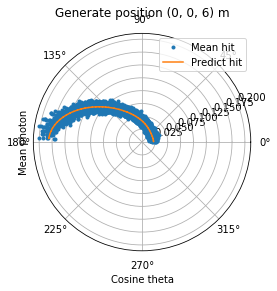

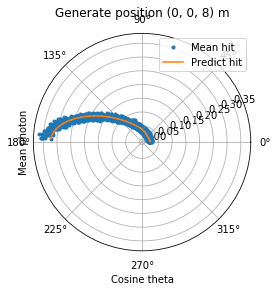

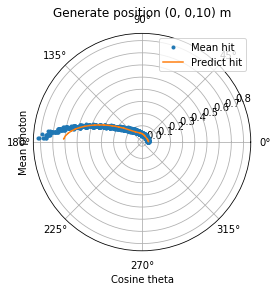

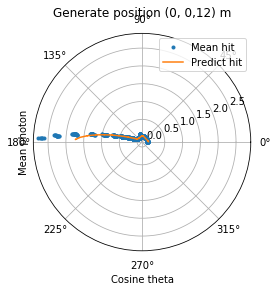

In [40]:
for i in np.arange(0,121,10):
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
    ax.plot(np.arccos(cos_theta), expect[i],'.')
    ax.plot(np.arccos(cos_theta), predict[i])
    plt.xlabel('Cosine theta')
    plt.ylabel('Mean photon')
    plt.title('Generate position (0, 0,%2.f) m' % (i*0.2-12))
    plt.legend(['Mean hit','Predict hit'])
    plt.show()

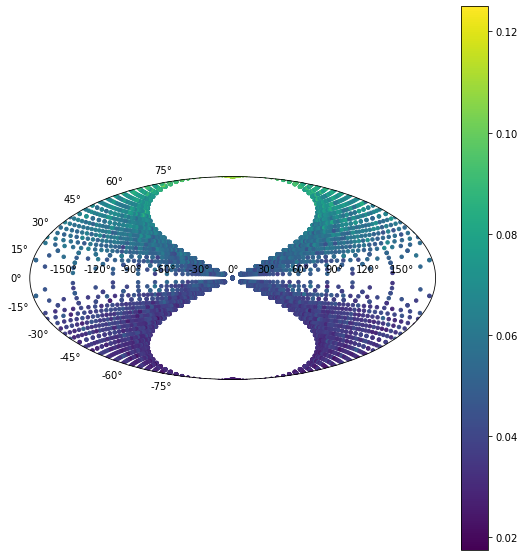

In [75]:
vertex = np.array([0,0,10])
cos_theta = np.sum(vertex*PMT_pos,axis=1)\
    /np.sqrt(np.sum(vertex**2)*np.sum(PMT_pos**2,axis=1))
phi = np.arctan(PMT_pos[:,2]/(PMT_pos[:,1]+1e-3))
plt.figure(figsize=(20,10))
plt.subplot(1,2,1,projection="aitoff")
plt.scatter(np.transpose(phi)*np.pi,cos_theta*np.pi/2,s=12, c=expect[40])
plt.colorbar()

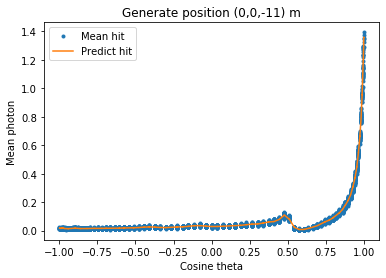

In [16]:
i=5
plt.plot(cos_theta, expect[i],'.')
plt.plot(cos_theta, predict[i])
plt.xlabel('Cosine theta')
plt.ylabel('Mean photon')
plt.title('Generate position (0,0,%2.f) m' % (i*0.2-12))
plt.legend(['Mean hit','Predict hit'])
plt.show()

Text(0, 0.5, 'abs coeff')

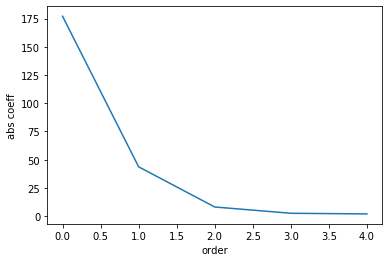

In [10]:
# legendre spectrum
plt.plot(np.abs(coeff[15]))
plt.xlabel('order')
plt.ylabel('abs coeff')

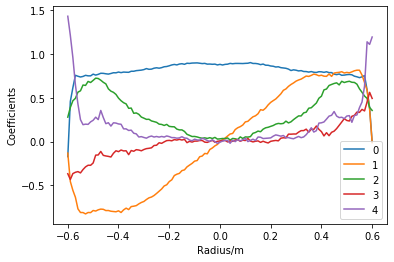

In [32]:
import os
import tables
def findfile(radius):
    filename = '../coeff_pe_1t/file_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    #expect = np.array(h.root.mean)[:]
    #predict = np.array(h.root.predict)[:]
    h.close()
    #return coeff, expect, predict
    return coeff
coeff = [];
expect = [];
predict = [];
radius = np.arange(0.6001,-0.60,-0.01)
for i in radius:
    file_str = '%+.2f' % i
    #a1,a2,a3 = findfile(file_str)
    a1 = findfile(file_str)
    coeff.append(a1)
    #expect.append(a2)
    #predict.append(a3)
pe_coeff = np.array(coeff)
plt.plot(radius, pe_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')

plt.legend(range(5))
plt.show()

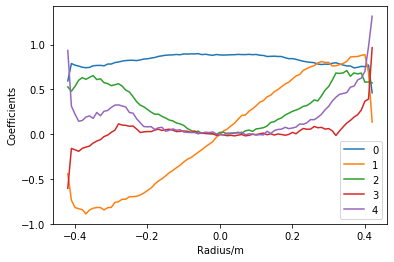

In [36]:
import os
import tables
def findfile(radius):
    filename = '../coeff_old/coeff_pe_1t/file_' + radius + '.h5'
    #print(filename)
    h = tables.open_file(filename,'r')
    coeff = np.array(h.root.coeff)[:]
    h.close()
    return coeff
coeff = [];
expect = [];
predict = [];
radius = np.arange(0.4201,-0.42,-0.01)
for i in radius:
    file_str = '%+.2f' % i
    #a1,a2,a3 = findfile(file_str)
    a1 = findfile(file_str)
    coeff.append(a1)
    #expect.append(a2)
    #predict.append(a3)
pe_coeff = np.array(coeff)
plt.plot(radius, pe_coeff)
plt.xlabel('Radius/m')
plt.ylabel('Coefficients')

plt.legend(range(5))
plt.show()